## Тестовый стенд для паренклитика

Привет.

Смотри. Наша с тобой задача - создать несколько объектов таким образом, чтобы потом можно было легко менять в них что-то, для того, чтобы создать новые объекты. При этом каждый объект отвечает за какое-то свое действие.

Я написал не самый оптимальный скрипт, `parenclitic_oop.py`, который, тем не менее, поможет нам справится с задачей.

Просмотри его: сначала нижний раздел `Classes to make it all work` - `For Zanin`, затем сверху то, что под капотом: `Classes` - `Zanin parenclitic graphs`.

В данном случае классы очень удобны - каждая часть отвечает за свой участок (загрузка, формирование имен колонок, создание моделей, подготовка графов и аггрегация всего механизма).
Такая структура позволила мне быстро собрать как из конструктора обработку корреляционных графов А.Горбаня и использование ядерной оценки плотности (KDE) вместо линейных регрессий. Их не смотри, там пока много вопросов. 

Ниже ты увидишь, как все это работает. 

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
from itertools import combinations
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sma 

import sys
sys.path.append('/home/guest/Документы/src/cxs') # put your own path to parenclitic_oop.py

import parenclitic_oop as prct

from importlib import reload


In [3]:
"""
Loading ideal_sphere_10_65_65_20_20.csv
Splitting for train/test/healthy data
"""
# put your own path to .csv:
data = pd.read_csv('/home/guest/Документы/src/cxs/test/ideal_sphere_10_65_65_20_20.csv')
data = data.drop('Unnamed: 0', axis=1)

nodes_lst = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10']

X_train = data[data['label'] == 'TRAIN'].set_index('id').drop(['label', 'score'], axis=1)
X_test = data[data['label'] == 'TEST'].set_index('id').drop(['label', 'score'], axis=1)
y_train = data[data['label'] == 'TRAIN'].set_index('id')['score']
y_test = data[data['label'] == 'TEST'].set_index('id')['score']

X_healthy = data[(data['label'] == 'TRAIN') & \
    (data['score'] == 0)].set_index('id').drop(['label', 'score'], axis=1)


In [27]:
# fit regressions with healthy data ...
healthy_data = prct.Zanin(X_healthy, nodes_lst)

# load new data to make graphs (it can be healthy data or some new data - 
# the process of graph creation starts here)
clf = prct.DataFitter(healthy_data, X_train)

# data frame
# single patient - is 'id' in index, represents single graph
# to calculate graph chrars, .create_chars()method must be run
clf.create_chars()

Data for healthy loaded successfully
Features computed successfully
Models fitted successfully
Zanin is ready ...
New data fitted successfully
Graphs created...


btwnns_mean  btwnns_median  btwnns_std  btwnns_min  btwnns_max  \
id                                                                    
1            3.1            0.0    8.055433        27.0        27.0   
2            2.0            0.0    5.079370        17.0        17.0   
3            1.2            0.0    2.749545         9.0         9.0   
4            4.6            0.0    7.337575        19.0        19.0   
5            1.7            0.0    5.100000        17.0        17.0   
..           ...            ...         ...         ...         ...   
126          3.5            3.5    3.471311        10.0        10.0   
127          5.9            3.0    8.190849        27.0        27.0   
128          2.8            0.0    6.645299        22.0        22.0   
129          5.0            0.0    8.532292        23.0        23.0   
130          3.3            0.0    9.900000        33.0        33.0   

     clsns_mean  clsns_median  clsns_std  clsns_min  clsns_max  ...  \
id                                                              ...   
1      5.353308      5.463435   1.661045   7.637381   7.637381  ...   
2      0.784547      0.846162   0.221034   1.079997   1.079997  ...   
3      2.333186      2.258868   0.415002   3.147155   3.147155  ...   
4     11.732242     12.231765   3.568517  16.687854  16.687854  ...   
5      1.186006      1.179754   0.248610   1.801008   1.801008  ...   
..          ...           ...        ...        ...        ...  ...   
126    1.121059      1.031001   0.270569   1.478735   1.478735  ...   
127    1.259848      1.396615   0.395857   1.656059   1.656059  ...   
128    0.903870      0.927413   0.217413   1.292933   1.292933  ...   
129    1.323311      1.429826   0.410003   1.714257   1.714257  ...   
130    0.619458      0.629279   0.181662   1.007520   1.007520  ...   

     auth_mean  auth_median  auth_std  auth_min  auth_max  strength_mean  \
id                                                                         
1          0.1     0.104732  0.025932  0.126670  0.126670       3.896040   
2          0.1     0.102772  0.017228  0.117990  0.117990      15.823977   
3          0.1     0.102039  0.018023  0.122205  0.122205       4.480778   
4          0.1     0.115678  0.054349  0.177870  0.177870       4.215012   
5          0.1     0.098383  0.023176  0.138988  0.138988       9.438023   
..         ...          ...       ...       ...       ...            ...   
126        0.1     0.095678  0.042565  0.173515  0.173515      19.340615   
127        0.1     0.101517  0.032509  0.149190  0.149190      18.379391   
128        0.1     0.104279  0.034597  0.157190  0.157190      18.408728   
129        0.1     0.111304  0.033871  0.140717  0.140717      22.319104   
130        0.1     0.099944  0.028772  0.136231  0.136231      32.453006   

     strength_median  strength_std  strength_min  strength_max  
id                                                              
1           3.985206      1.147732      5.470496      5.470496  
2          16.005966      3.260701     19.663387     19.663387  
3           4.519501      0.853702      5.579207      5.579207  
4           4.683904      2.344383      7.863959      7.863959  
5           8.957236      2.452776     13.895770     13.895770  
..               ...           ...           ...           ...  
126        17.098399      8.777742     39.224949     39.224949  
127        17.309378      7.458977     32.894366     32.894366  
128        18.601626      6.817311     31.405787     31.405787  
129        24.068395      8.929074     37.743275     37.743275  
130        31.189943     10.571589     47.720039     47.720039  

[130 rows x 35 columns]

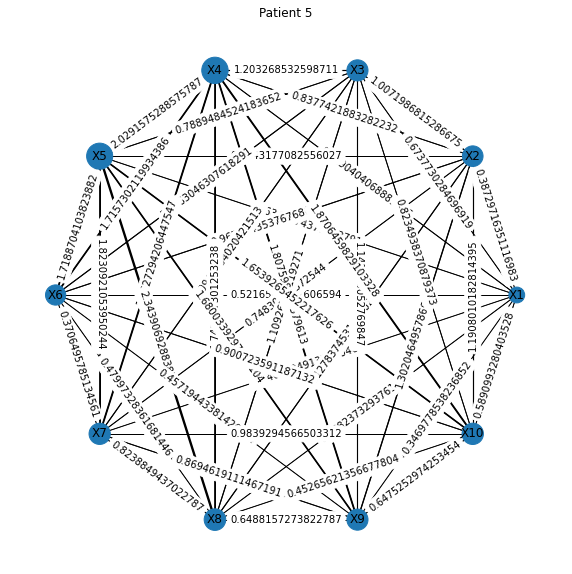

In [28]:
"""
To get a single graph we look into 
```clf.graphs.graphs``` attribute. It is a dict with patient 'id'
as a key, and nx.classes.graph.Graph object as value
"""

# Graph with patient 'id' = 5

G = clf.graphs.graphs.get(5)

# now we can plot it:
prct.graph_plotter(G, title='Patient 5')